# Red Neuronal 3 con TensorFLow y Keras

DEscripción: ajustamos el parámetro 'loss' de la red neuronal con el objetivo de mejorar el ROC AUC SCORE, al igual que buscar un mejor balance y accuracy del modelo.

Volvemos a plicar el OneHotEncoder, teniendo en cuenta que la red neuronal se ve perjudicada por la disminución de columnas

Importamos las librerias necesarias

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Importo el Dataframe de train ajustado 

In [2]:
df = pd.read_csv("../DF_Dummis_RN/df_trainDUMMIES.csv")

Verifico las columnas

In [3]:
df.columns

Index(['Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [4]:
df.shape

(410000, 22)

Escojo una muestra de 2000 valores aleatorios del total de los datos, separo en <font color='yellow'>df_SampleEntrada</font> y <font color='yellow'>df_SampleSalida</font> donde se encuentra la columna  'Long_duration' que contiene el dato que se quiere entrenar a para poder predecrilo

In [5]:
df_Sample = df.sample(n = 2000)

In [6]:
df_SampleEntrada = df_Sample[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [7]:
df_SampleSalida = df_Sample['Long_duration']

Creamos la red neuronal y entrenamos la red neuronal, tiene 15 capas ocultas y se entreno con OneHotEncoder de las columnas <font color='yellow'>'Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female','gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes', 'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity' </font> (las mismas de la Red Neuronal 1).

En esta ocasión, cambiaremos el parámetro loss por <font color='yellow'>'mean_squared_logarithmic_error'</font>, teniendo en cuenta que la Red Neuronal 1 fue la que obtuvo el mejor ROC_AUC_SCORE de las dos anteriores

In [9]:
oculta1 = tf.keras.layers.Dense(units = 22 , input_shape=(21,))
oculta2 = tf.keras.layers.Dense(units = 21)
oculta3 = tf.keras.layers.Dense(units = 25)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [10]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_logarithmic_error'
)

In [11]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_SampleEntrada.values, df_SampleSalida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
63/63 [==============================] - 3s 5ms/step - loss: 0.2600
Epoch 2/500
63/63 [==============================] - 0s 4ms/step - loss: 0.2250
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 5/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1706
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1628
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1568
Epoch 8/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1509
Epoch 9/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1353
Epoch 11/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1290
Epoch 12/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1232
Epoch 13/

Vemos el historial de perdida del modelo

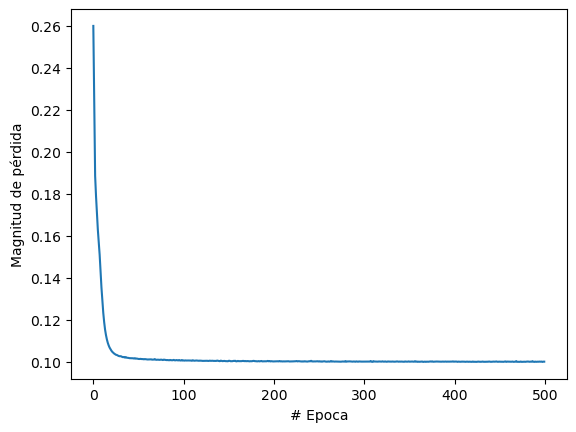

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

Se evidencia una mejora respecto a la Red Neuronal 1

Vemos el peso que le otrogó el modelo a cada una de las capas

In [13]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(oculta5.get_weights())
print(oculta6.get_weights())
print(oculta7.get_weights())
print(oculta8.get_weights())
print(oculta9.get_weights())
print(oculta10.get_weights())
print(oculta11.get_weights())
print(oculta12.get_weights())
print(oculta13.get_weights())
print(oculta14.get_weights())
print(oculta15.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.1348275 ,  0.18703847,  0.00866266,  0.16401707, -0.14755091,
        -0.11710272, -0.2815278 ,  0.07127535, -0.25007072, -0.3699496 ,
        -0.36280456, -0.2769002 , -0.31194708,  0.12375565,  0.20628324,
         0.28473946, -0.33399633, -0.00082975,  0.33287802, -0.3077881 ,
        -0.2951197 , -0.19270034],
       [-0.3248728 , -0.37389445, -0.11572646,  0.01949115,  0.19842616,
         0.07758059,  0.05264503,  0.22454652,  0.2757323 ,  0.00736669,
        -0.25344658,  0.23350203, -0.3791899 , -0.08065758, -0.21026042,
         0.1624047 ,  0.20080748, -0.40094548,  0.01217769, -0.24753955,
        -0.28934634, -0.14760783],
       [-0.18110576, -0.21295232, -0.28004876,  0.16270149, -0.04706416,
         0.22721137, -0.23587212, -0.2728945 ,  0.12811765,  0.2651965 ,
        -0.2993772 ,  0.3373859 ,  0.18069775,  0.32743505,  0.02396742,
         0.1356715 ,  0.05066665,  0.30358824,  0.08165766,  0.3021516 ,
        -0.34566778, -0

Seleccionamos los datos de DF con lo que vamos a hacer la predicción y la respuesta de estos para probar el modelo posteriormente

In [14]:
df_prediccion = df.sample(n = 90000)

In [15]:
df_prediccion_ENTRADA = df_prediccion[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [16]:
df_prediccion_CORRECTAS = df_prediccion['Long_duration']

Probamos el modelo entrenado

In [17]:
print("Predición de unos datos")
resultado = modelo.predict(df_prediccion_ENTRADA.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [18]:
resultado = np.round(resultado, decimals=0)

In [19]:
print(classification_report(df_prediccion_CORRECTAS, resultado))

              precision    recall  f1-score   support

           0       0.48      0.75      0.58     34001
           1       0.77      0.50      0.60     55999

    accuracy                           0.59     90000
   macro avg       0.62      0.63      0.59     90000
weighted avg       0.66      0.59      0.60     90000



Aunque se ve una leve disminución del accuracy respecto al modelo de la Red Neuroral 1, tiene un mejor balance en el recall. De igual forma el ROC AUC SCORE mejoró

In [20]:
roc_auc_score(y_true= df_prediccion_CORRECTAS, y_score= resultado)


0.6256693113974887

Ahora hacemos las prediciones con el df de test

In [21]:
df_test = pd.read_csv("../DF_Dummis_RN/df_test_DUMMIES.csv")

In [22]:
df_test = df_test[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [23]:
print("Predición de unos datos")
resultado = modelo.predict(df_test.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [24]:
resultado = np.round(resultado, decimals=0)

In [25]:
respuesta = pd.DataFrame(resultado, columns=['pred'])


In [26]:
respuesta['pred'] = respuesta['pred'].astype(int)


In [27]:
respuesta.head()

,pred
0,0
1,1
2,1
3,0
4,1


In [28]:
from pathlib import Path
filepath = Path('../Predicciones/prediccion_RN_3.csv')
respuesta.to_csv(filepath,index=False)

Guardamos el modelo entrenado

In [30]:
filepath = Path('../Modelos/RN_3.h5')
modelo.save(filepath)